<a href="https://colab.research.google.com/github/Gabriel-albuq/YoloClassify/blob/main/TreinoCorBiscoitoYOLOV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Documentação

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics

## Endereços

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
import sys
sys.executable

'/usr/bin/python3'

## Instalação de Bibliotecas e Pastas

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
print(ultralytics.__file__)

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/78.2 GB disk)


/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py


In [ ]:
# Git clone method (for development)

%cd {HOME}
!git clone https://github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

# Obtém o diretório atual
current_directory = os.getcwd()

if os.path.exists(os.path.join(current_directory, 'ultralytics')):
    print("O repositório 'ultralytics' foi clonado neste diretório:", current_directory)
else:
    print("O repositório 'ultralytics' não foi clonado neste diretório.")

O repositório 'ultralytics' foi clonado neste diretório: /content/ultralytics


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Dataset

In [ ]:
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/ultralytics/drive') #Montar o drive dentro do ultralytics

Mounted at /content/ultralytics/drive


In [ ]:
drive_data_path = '/content/drive/My Drive/DataSetRoboFlow'


## Criação do modelo

In [ ]:
from ultralytics import settings

# Update a setting

#settings.update({'datasets_dir': r'C:/Users/PICHAU/Documents/MDias/ProjetoCV/TampaCaneta-3'})
#settings.update({'weights_dir': r'C:/Users/PICHAU/Documents/MDias/ProjetoCV/weights'})
#settings.update({'runs_dirr': r'C:/Users/PICHAU/Documents/MDias/ProjetoCV/runs'})

# Reset settings to default values
#settings.reset()
settings.update({'datasets_dir': ""})

!yolo settings

💡 Learn about settings at https://docs.ultralytics.com/quickstart/#ultralytics-settings
Printing '/root/.config/Ultralytics/settings.yaml'

settings_version: 0.0.4
datasets_dir: ''
weights_dir: weights
runs_dir: runs
uuid: 569f3ba64b326db489132663f79cd37279811de477381b83ac131e6cdd129cbb
sync: true
api_key: ''
clearml: true
comet: true
dvc: true
hub: true
mlflow: true
neptune: true
raytune: true
tensorboard: true
wandb: true



In [ ]:
# Start training from a pretrained *.pt model
!yolo task=classify mode=train data=drive/MyDrive/Dataset model=yolov8n-cls.pt epochs=10 imgsz=64

100% 5.28M/5.28M [00:00<00:00, 63.9MB/s]
Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=drive/MyDrive/Dataset, epochs=10, patience=50, batch=16, imgsz=64, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!ls {HOME}/runs/detect/train6/

ls: cannot access '/content/runs/detect/train6/': No such file or directory


In [ ]:
%cd {HOME}
#Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

## Teste

In [ ]:
%cd {HOME}
!yolo task=classify mode=val model=/content/ultralytics/runs/classify/train/weights/best.pt data=ultralytics/drive/MyDrive/Dataset imgsz=64

/content
Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/ultralytics/drive/MyDrive/Dataset/train... found 4500 images in 3 classes ✅ 
val: None
test: /content/ultralytics/drive/MyDrive/Dataset/test... found 28 images in 3 classes ✅ 
               classes   top1_acc   top5_acc: 100% 2/2 [00:01<00:00,  1.25it/s]
                   all          1          1
Speed: 0.0ms preprocess, 8.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val4


/content


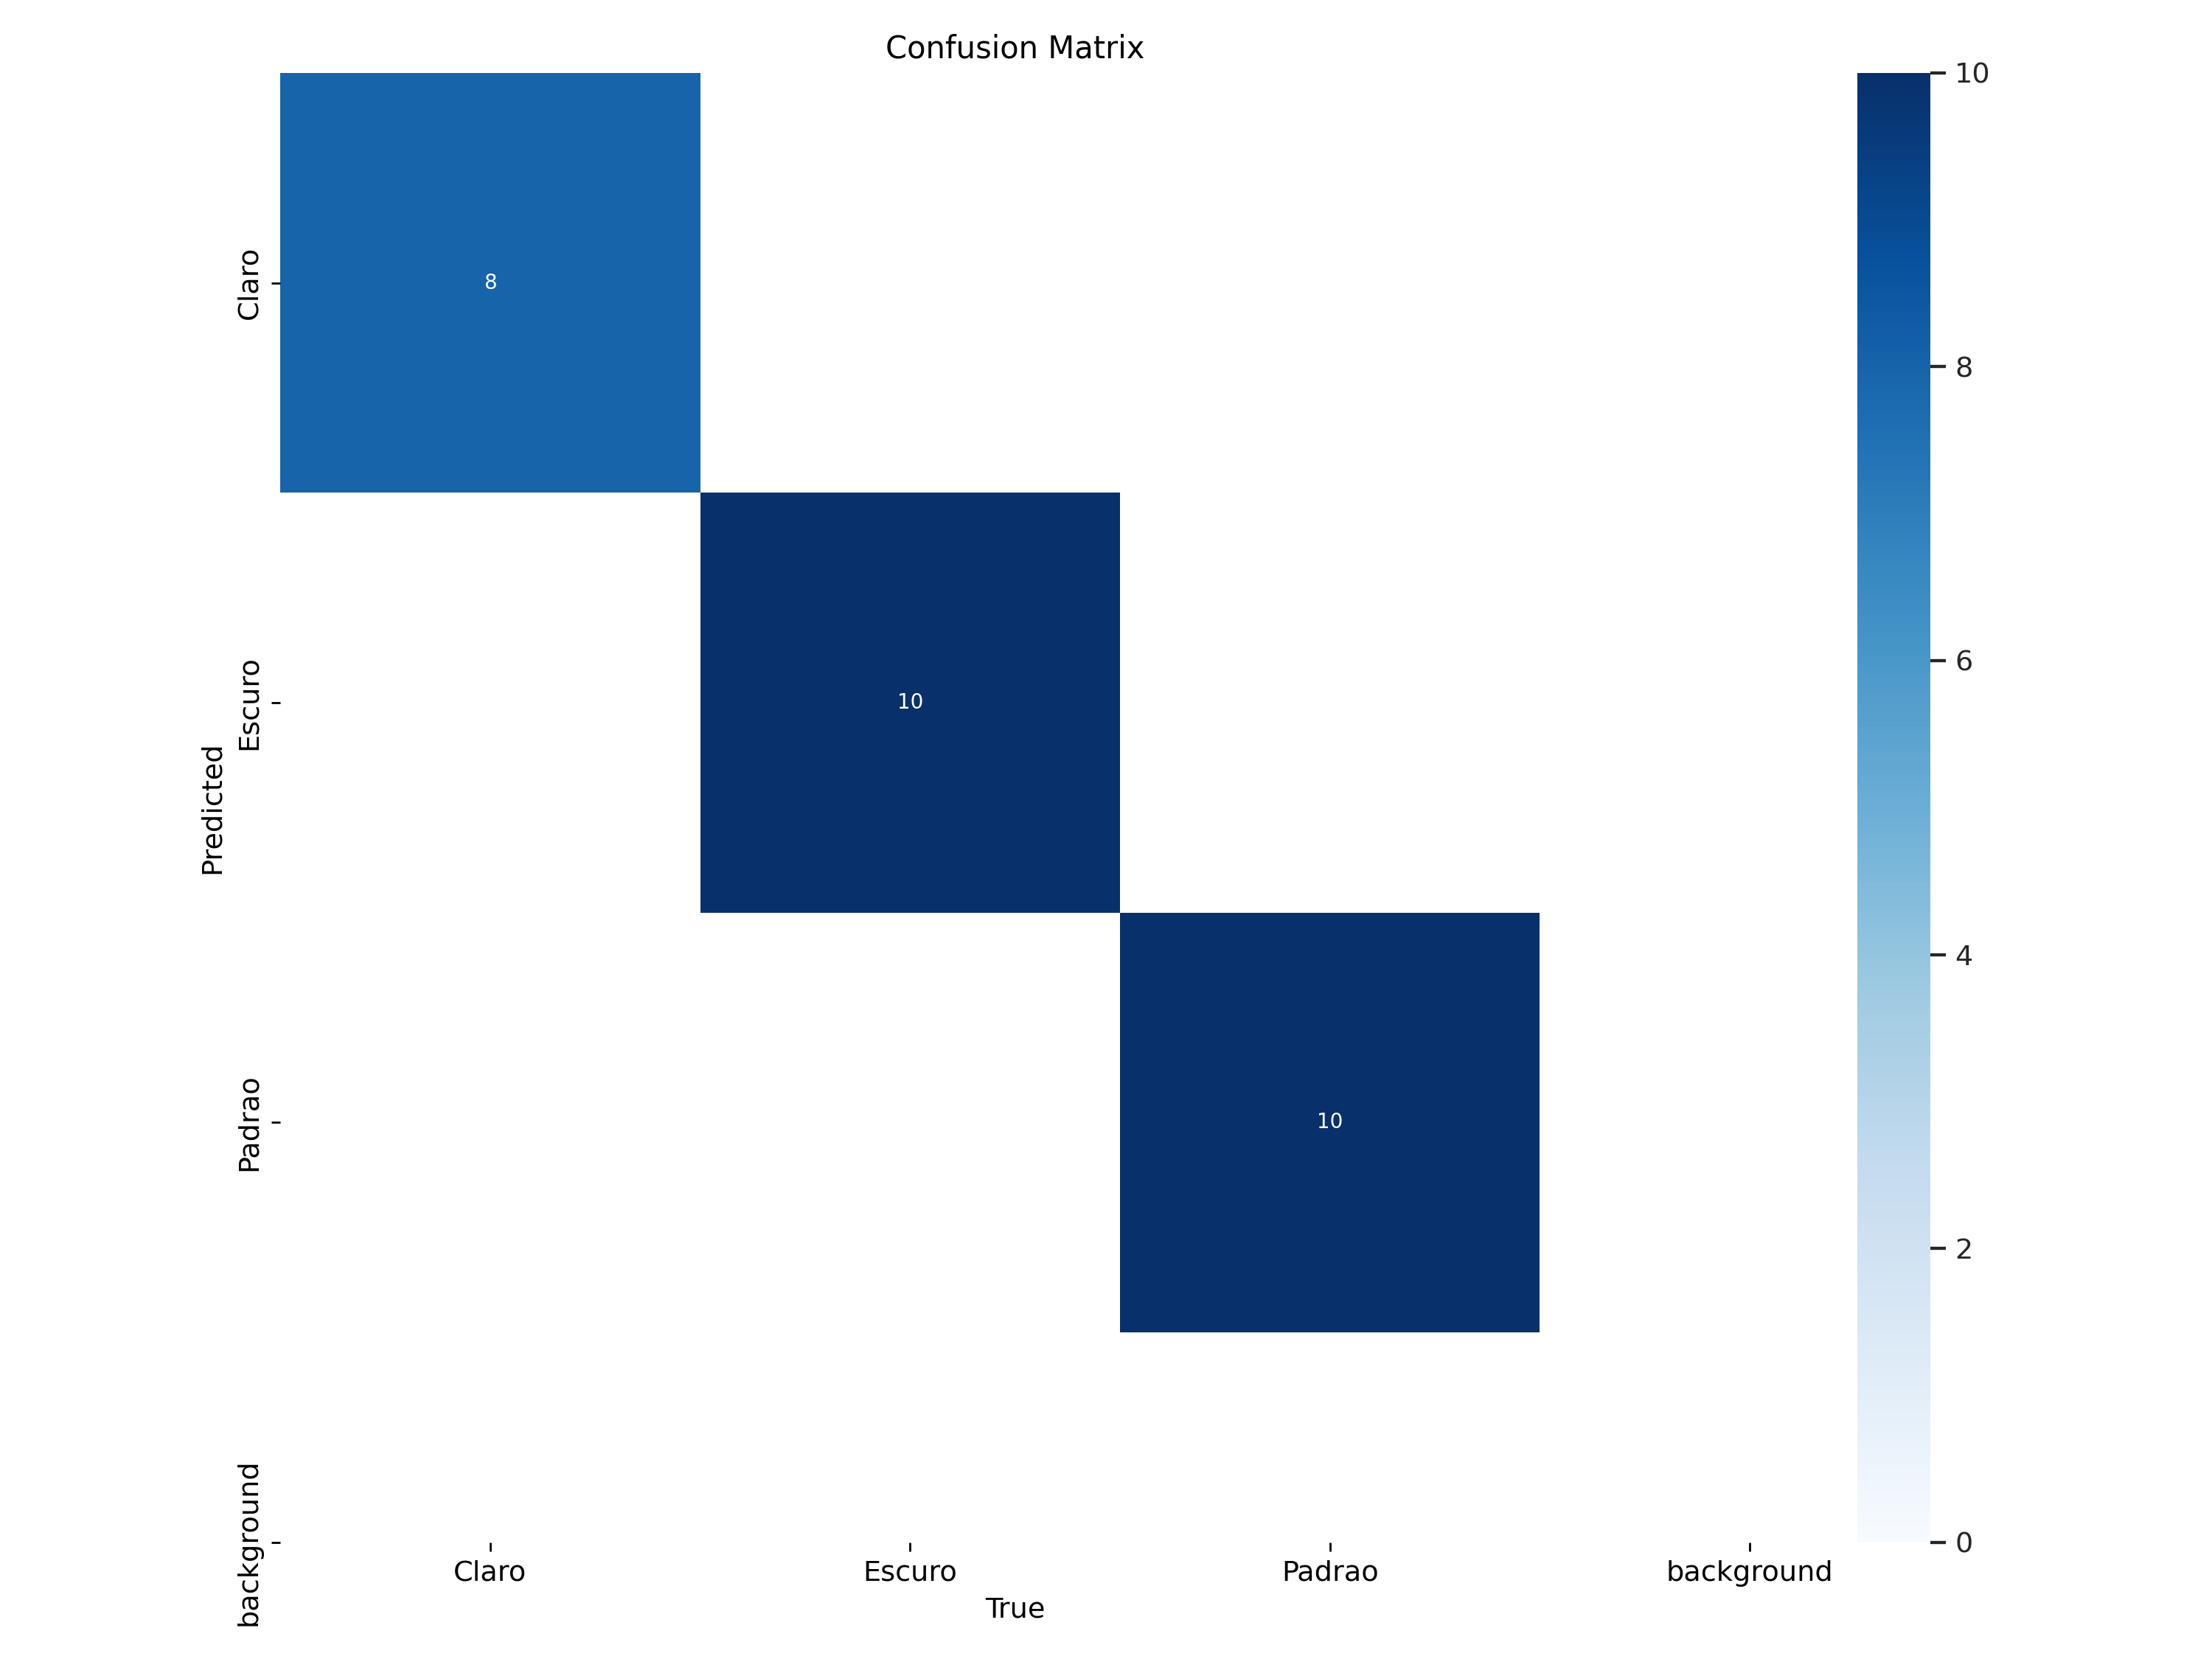

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/val4/confusion_matrix.png', width=600)

/content


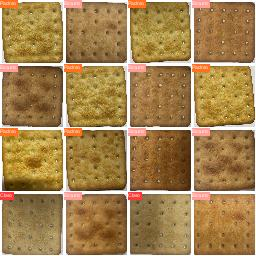

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/val4/val_batch0_labels.jpg', width=600)

/content


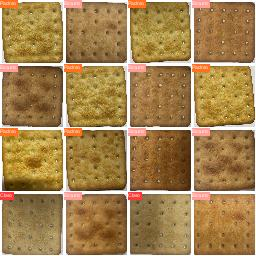

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/classify/val4/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo classify predict model="/content/ultralytics/runs/classify/train/weights/best.pt" source="Claro 1_generated_image_148.jpg"  # predict with official model

Ultralytics YOLOv8.0.158 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1438723 parameters, 0 gradients

image 1/1 /content/Claro 1_generated_image_148.jpg: 64x64 Claro 1.00, Padrao 0.00, Escuro 0.00, 4.3ms
Speed: 1.0ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 64, 64)
Results saved to runs/classify/predict6
